In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
train_data = pd.read_csv("Data/CE802_P3_Data.csv",sep=',')
test_data = pd.read_csv("Data/CE802_P3_Test.csv",sep=',')
file_name="Data/CE802_P3_Test_KNN.csv"


Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,NaN


In [4]:
cleanup = {"F12": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
train_data = train_data.replace(cleanup)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,4,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,2,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,2,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,4,-22863.72,-3.12,-54.36,2424.42,109.19


In [5]:
test = test_data.replace(cleanup)
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,4,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,0,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,1,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,2,-13748.25,-9.21,-18.96,1261.38,NaN


In [6]:
cleanup = {"F4": {"UK":1, "USA":2, "Europe":3, "Rest":4}}
train_data = train_data.replace(cleanup)
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,4,-98.88,529.56,4.54,379.54,1,1,7.30,3,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,4,-59.22,493.11,0.05,402.78,5,3,-1.28,0,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,1,-228.48,563.79,1.22,147.35,4,4,8.28,1,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,1,-173.28,536.94,0.25,113.49,4,3,6.26,1,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,2,-193.14,617.52,9.15,343.64,8,6,-6.88,0,-14434.13,-9.45,-46.14,1435.90,373.56


In [7]:
test = test.replace(cleanup)
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,2,-280.95,581.10,0.06,214.35,2,2,-0.88,1,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,4,-228.00,330.54,0.31,-164.98,1,9,0.28,2,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,4,-59.67,662.28,4.98,281.54,6,5,5.82,1,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,1,-211.23,506.55,0.57,-311.96,7,5,1.92,3,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,4,-284.82,649.41,0.05,291.47,8,3,-0.02,1,-9901.41,-13.47,-48.81,2251.04,NaN


In [8]:
X = train_data.drop('Target', axis=1)
y = train_data['Target']

X_test=test.drop('Target',axis=1)

In [9]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

In [10]:
X_train, X_valid, y_train, y_valid =train_test_split(X, y, random_state=1, test_size = 0.2)

In [11]:
knn = KNeighborsRegressor ( n_neighbors = 9,weights="distance")

In [12]:
knn.fit (X_train, y_train)    

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')

In [13]:
train_score=knn.score(X_train, y_train)
train_score

1.0

In [14]:
cv_score = cross_val_score(knn, X, y, cv = 5, scoring='r2')
print("CV mean score: ", cv_score.mean())

CV mean score:  0.5865395773755363


In [15]:
y_predict = knn.predict(X_valid)

In [16]:
valid_score=knn.score(X_valid, y_valid)
valid_score

0.6260786798136162

In [17]:
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted': y_predict})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,0.00,430.448606
1,45.78,134.485878
2,0.00,163.057899
3,112.05,607.809412
4,0.00,809.170105
5,0.00,264.530226
6,40.59,375.428554
7,1281.85,1601.693416
8,768.95,670.269920


In [18]:
mae = sum(abs(y_predict - y_valid)) /len(y_predict)

print(mae)

438.8257365376937


In [19]:
error = []
min_error=100000000
optimal_neighbor_number=10

for i in range(1,50):
    knn = KNeighborsRegressor ( n_neighbors = i,weights="distance")
    knn.fit (X_train, y_train)
    cv_score = cross_val_score(knn, X, y, cv = 5, scoring='r2')
    print("CV mean score: ", cv_score.mean())
    pred_i = knn.predict(X_valid)
    err= sum(abs(pred_i - y_valid)) /len(pred_i)
    error.append(err)
    
    if err<=min_error:
        min_error=err
        optimal_neighbor_number=i

CV mean score:  0.277514988450705
CV mean score:  0.4731789949935754
CV mean score:  0.5426781329389014
CV mean score:  0.5583258753561234
CV mean score:  0.5823376567084468
CV mean score:  0.581981144741826
CV mean score:  0.5871978907787542
CV mean score:  0.5873948805176192
CV mean score:  0.5865395773755363
CV mean score:  0.5802352751443269
CV mean score:  0.5785068495556518
CV mean score:  0.5746599372917777
CV mean score:  0.5726051555687115
CV mean score:  0.5724919580126693
CV mean score:  0.5679579993331447
CV mean score:  0.5662754215806574
CV mean score:  0.5642197540901313
CV mean score:  0.5646857883728116
CV mean score:  0.5617664635934105
CV mean score:  0.5623781374514445
CV mean score:  0.5593994884335297
CV mean score:  0.5566179723231828
CV mean score:  0.5554391900234152
CV mean score:  0.5548997002399727
CV mean score:  0.552845485571114
CV mean score:  0.5497422531473091
CV mean score:  0.5473612478016845
CV mean score:  0.5447076280510359
CV mean score:  0.54205

Text(0, 0.5, 'Mean Error')

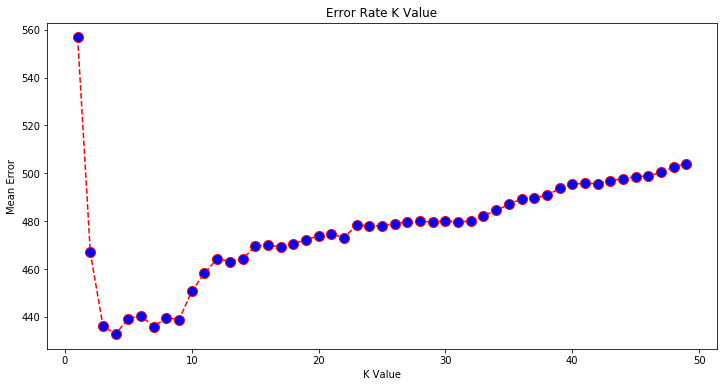

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [21]:
print("Optimal k-number of nearest neighbours is",optimal_neighbor_number)

Optimal k-number of nearest neighbours is 4


In [22]:
knn = KNeighborsRegressor (n_neighbors = optimal_neighbor_number,weights="distance")

In [23]:
knn.fit (X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='distance')

In [24]:
cv_score = cross_val_score(knn, X, y, cv = 5, scoring='r2')
print("CV mean score: ", cv_score.mean())

CV mean score:  0.5583258753561234


In [25]:
y_predict = knn.predict(X_valid)

In [26]:
valid_score=knn.score(X_valid, y_valid)
valid_score

0.6222882455120593

In [27]:
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted': y_predict})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,0.00,434.617603
1,45.78,163.645962
2,0.00,0.000000
3,112.05,341.516297
4,0.00,429.306396
5,0.00,180.546937
6,40.59,506.913504
7,1281.85,2080.995819
8,768.95,293.007556


In [28]:
mae = sum(abs(y_predict - y_valid)) /len(y_predict)

print(mae)

432.85129813881304


In [29]:
y_predict = knn.predict(X_test)
for i in range(0,len(y_predict)):
    test_data.loc[i,'Target']=y_predict[i]

In [30]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,1190.482977
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,136.229779
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,2137.953799
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,1191.880416
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,193.724062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,3429.650038
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,619.065398
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,1260.145473
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,25.822677


In [31]:
test_data.to_csv(file_name, sep=',')